# M1C 2nd Python coursework

### Aleksander Grzyb 
### CID: 01072956

In [1]:
% matplotlib inline

## Question 1.

## a)
#### This function creates a list containing 0 as the initial value and then with each iteration appends next value calculated recursively until it reaches the maximum number of iterations.


In [2]:
def complex_map_iterates(c,n):
        its=[0]
        for i in xrange(n):
            its.append((its[i]*its[i])+c)
        return its

#### The function seems to work:

In [3]:
complex_map_iterates(1+1j,4)

[0, (1+1j), (1+3j), (-7+7j), (1-97j)]

## b)

### i. 
#### For c = 0.01 + 0.03i the iterated map clearly tends to a limit.

In [4]:
complex_map_iterates(0.01+0.03j,10)

[0,
 (0.01+0.03j),
 (0.0092+0.0306j),
 (0.00914828+0.03056304j),
 (0.009149591612916801+0.0305591984951424j),
 (0.009149850414017644+0.03055920837249723j),
 (0.009149854546245194+0.030559224370758288j),
 (0.009149853644075097+0.03055922491607702j),
 (0.009149853594236613+0.030559224870916956j),
 (0.009149853596084695+0.030559224867044488j),
 (0.009149853596355194+0.030559224867086576j)]

### ii.
#### After 12 iterations for c = -0.5 + 0.65i the map has an absolute value greater than 2. 

In [5]:
cmi=complex_map_iterates(-0.5+0.65j,15)

In [6]:
cmi

[0,
 (-0.5+0.65j),
 (-0.6725000000000001+0j),
 (-0.04774374999999986+0.65j),
 (-0.9202205343359375+0.5879331250000002j),
 (0.0011404723412525852-0.4320562688825954j),
 (-0.6866713188035884+0.6490145035509493j),
 (-0.44970232575202573-0.24131929015197306j),
 (-0.3560028180126711+0.8670436920603404j),
 (-1.1250267575086634+0.03266000457281648j),
 (0.7646185292117607+0.5765132419104524j),
 (-0.24772602288414375+1.5316254142013481j),
 (-2.784508227013456-0.1088469448167586j),
 (7.241638408909677+1.256170426655088j),
 (50.36336270459305+18.843464019603882j),
 (2180.8921666562883+1898.6904260605186j)]

In [7]:
abs(cmi[11])

1.5515297586064685

In [8]:
abs(cmi[12])

2.786634838600415

### iii.
#### For c = 0.01 - 0.5i the iterated map remains bounded after 20 iterations and seems to be neither convergent nor cyclical.

In [9]:
complex_map_iterates(0.01-0.5j,20)

[0,
 (0.01-0.5j),
 (-0.2399-0.51j),
 (-0.19254799-0.25530200000000003j),
 (-0.018104382750959908-0.40168422611404j),
 (-0.15102244883404192-0.4854555100508166j),
 (-0.20285927218686767-0.35337064014429365j),
 (-0.07371892500380221-0.3566309782562421j),
 (-0.11175117474828802-0.44741909531979096j),
 (-0.1776955217991578-0.4000007809863942j),
 (-0.11842492632225034-0.3578433050051041j),
 (-0.10402736776254554-0.41524486593972j),
 (-0.1516066054456921-0.41360633923875967j),
 (-0.13808564104372217-0.37458909383438455j),
 (-0.11124934495720966-0.396549249699784j),
 (-0.1348748906840534-0.4117683114552521j),
 (-0.14136190618167416-0.38892558801063126j),
 (-0.12127992449009885-0.3900414750319774j),
 (-0.12742353216079655-0.40539159872023j),
 (-0.13810559176461043-0.39668714116551207j),
 (-0.12828753348941366-0.3904305752478508j)]

## c)
#### This function iterates the recurrence relation as long as the absolute value of the current term is less than 2 and the number of iterations executed is less the maximum number specified by the user. If after a number of iterations the absolute value is greater than 2, the function returns this number of iterations, otherwise it returns the maximum number of iterations. 

In [10]:
def escape_time(c, nmax):
    i=0
    val=0
    while(abs(val)<=2 and i<nmax):
        val=(val*val)+c
        i=i+1
    return i

#### The function returns correct value for this example:

In [11]:
escape_time(0.5+0.03j,10)

5

In [12]:
cmi1=complex_map_iterates(0.5+0.03j,10)

In [13]:
cmi1

[0,
 (0.5+0.03j),
 (0.7491+0.06j),
 (1.05755081+0.119892j),
 (1.604039624067656+0.28358376342504j),
 (2.9925233647007983+0.9397591865519845j),
 (8.57204875957134+5.65450264589806j),
 (42.00661976400038+96.97134478352665j),
 (-7638.385605128293+8146.90681665077j),
 (-8027155.526559673-124458431.47925362j),
 (-1.542546594042849e+16+1998094372151278.2j)]

In [14]:
abs(cmi1[4])

1.6289146283514726

In [15]:
abs(cmi1[5])

3.136613367469608

## d)
#### The script calculates logarithms of escape time for a square in the complex plane with side length 2. It does it by creating a set of equally spaced points and calculating the values for them which is a decent approximation of a continuous square. Then it plots the calculated values on a graph.

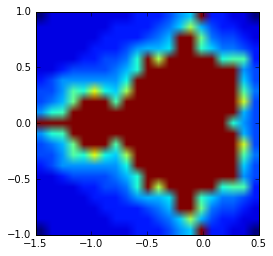

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# set parameters
xmin = -1.5
xmax = 0.5
ymin = - 1.0
ymax = 1.0
npoints = 21
# calculate step sizes
xstep = (xmax - xmin)/float(npoints - 1)
ystep = (ymax - ymin)/float(npoints - 1)
# initialize array
et_array = np.zeros([npoints, npoints])
# nested loop
for x_index in xrange(npoints):
    # real part of c
    x = xmin + x_index * xstep
    for y_index in xrange(npoints):
        # imaginary part of c
        y = ymin + y_index * ystep
        # calculate c
        c = x+y*1j
        # calculate log of escape time and drop into array
        log_et = np.log(escape_time(c, 200))
        et_array[npoints-y_index-1, x_index] = log_et
# plot array as a bitmap
plt.imshow(et_array, extent = [xmin, xmax, ymin, ymax])
plt.show()

## e)
#### The function is very similar to the script from part d)

In [17]:
def mandelbrot_array(xmin, xmax, ymin, ymax, npoints):
    # calculate step sizes
    xstep = (xmax - xmin)/float(npoints - 1)
    ystep = (ymax - ymin)/float(npoints - 1)
    # initialize array
    et_array = np.zeros([npoints, npoints])
    # nested loop
    for x_index in xrange(npoints):
        # real part of c
        x = xmin + x_index * xstep
        for y_index in xrange(npoints):
            # imaginary part of c
            y = ymin + y_index * ystep
            # calculate c
            c = x+y*1j
            # calculate log of escape time and drop into array
            log_et = np.log(escape_time(c, 200))
            et_array[npoints-y_index-1, x_index] = log_et
    return et_array

## f)
#### This function together with mandelbrot_array work exactly the same as the script from part d) but are implemented as functions.

In [18]:
def mandelbrot_plot(xmin,xmax,ymin,ymax,npoints):
    et_array= mandelbrot_array(xmin, xmax, ymin, ymax, npoints)
    plt.imshow(et_array, extent = [xmin, xmax, ymin, ymax])
    plt.show()
    return

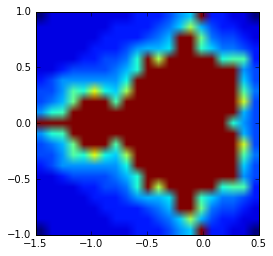

In [19]:
mandelbrot_plot(-1.5, 0.5, -1.0, 1.0, 21)

In [1]:
mandelbrot_plot(-1.5, 0.5, -1.0, 1.0, 2001)

NameError: name 'mandelbrot_plot' is not defined

## g)
#### I really appreciate the esthetic value of the second square...

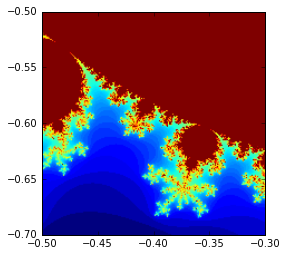

In [21]:
mandelbrot_plot(-0.5, -0.3, -0.7, -0.5, 201)

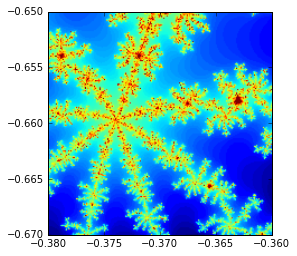

In [22]:
mandelbrot_plot(-0.38, -0.36, -0.67, -0.65, 201)

## Question 2.

## a)
#### The function caluclates the derivative and finds its roots symbolically. Then it checks whether the root is real and if this the case calculates the corresponding value, converts the pair from symbols to floats and appends it to the lists. Then it creates a dense interval of equally spaced points to mimic the continuous interval and calculates the values on it. Finally, it plots everything on a graph.

In [23]:
import sympy

In [24]:
def plot_with_SPs(expr, var, xmin, xmax):
    
    #calculate derivative and solve for stationary points
    dy=sympy.diff(expr, var)
    x_s=sympy.solve(dy,var)
    
    #initialize
    x_0=[]
    y_0=[]
    
    #calculate the values for real roots of the derivative
    for x in x_s:
        c=complex(x)
        if c.imag==0:
            val=float(x)
            x_0.append(val)
            y_0.append(expr.subs(var,val))
        
        #step size
    h=(xmax-xmin)/200.0
    
    x_vals=[]
    y_vals=[]
    
    #calculate the values on the interval
    for i in xrange(201):
        val=xmin+i*h
        x_vals.append(val)
        y_vals.append(expr.subs(var,val))
    
    #plotting
    plt.plot(x_vals,y_vals,x_0,y_0,'.r',markersize=10)
    plt.show()
    return



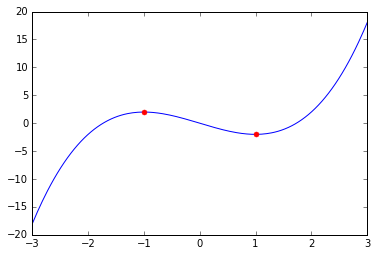

In [25]:
from sympy import symbols
x = symbols('x')
plot_with_SPs(x**3 - 3*x, x, -3, 3)

## b)

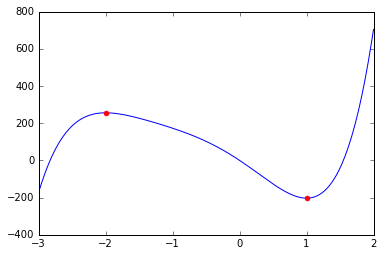

In [26]:
plot_with_SPs(12*x**5+45*x**4+40*x**3-60*x**2-240*x, x, -3.0, 2.0)

## Question 3

## a)
#### The code is in a separate file as Jupyter doesn't seem to handle very well the animations of this type. The first part of the code are the functions we used and described in previous parts, then we create sequentially the frames for our animation which with every iteration zooms in the neighbourhood of the chosen point. We save them under names reflecting their order and in the second part we load them in this order to get our animation.

## Question 4
##  a)
#### We define a class with one method:

In [27]:
class RSACipher(object):
    
    'A public-key RSA Cipher'
    
    def __init__(self, n, e):
        self.n = n
        self.e = e
    def encrypt(self, plaintext):
        return pow(plaintext,self.e,self.n)
    

## b)
#### Everything works properly:

In [28]:
my_cipher = RSACipher(7735534351, 79)
my_cipher.encrypt(12345)

3305244447L

In [29]:
cip2=RSACipher(82697,53)
cip2.encrypt(54321)

13302L

In [30]:
pow(54321,53,82697)

13302L

## c)
#### We use ehcf function from 1st coursework which is an implementation of Euclid's algorithm and returns coefficients of Bézout's identity and the highest common factor. We create a new class based on the old one which now takes primes and encryption key as the input and calculates the modulus n and decryption key d for us with the help of ehcf function and the Totient theorem. If the encryption key is not coprime with a totient it prints a warning. A few tests indicate that the class is working as intended.

In [31]:
def ehcf(a,b):
    p1=1
    q1=0
    h1=a
    p2=0
    q2=1
    h2=b
    while h2!=0:
        r=h1/h2
        p3=p1-r*p2
        q3=q1-r*q2
        h3=h1-r*h2
        p1=p2
        q1=q2
        h1=h2
        p2=p3
        q2=q3
        h2=h3
    return (p1,q1,h1)

In [32]:
class PrivateRSACipher (RSACipher):
    
    def __init__(self,primes,e):
        self.primes=primes
        self.e=e
    @property
    def primes(self):
        return self.__primes
    @primes.setter
    def primes(self, primes):
        self.__primes=(min(primes),max((primes)))
        self.n=primes[0]*primes[1]
    def decrypt(self, ciphertext):
        tot=(self.primes[0]-1)*(self.primes[1]-1)
        euclid=ehcf(self.e,tot)
        if euclid[2]==1:
            d=euclid[0]+self.e*tot
            return pow(ciphertext,d,self.n)
        else:
            print(str(self.e)+" is not coprime with ("+str(self.primes[0])+" - 1)*("+str(self.primes[1])+" - 1)")

In [33]:
cip3=PrivateRSACipher([93629, 82619],79)

cip3.encrypt(12345)

3305244447L

In [34]:
cip3.decrypt(cip3.encrypt(12345))

12345L

In [35]:
cip4=PrivateRSACipher([2017, 41],23)

cip4.decrypt(cip4.encrypt(13579))

13579L

In [36]:
cip5=PrivateRSACipher([2017,41],64)

cip5.decrypt(cip5.encrypt(2468))

64 is not coprime with (41 - 1)*(2017 - 1)
